In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [43]:
path = "household_power_consumption.txt"
df = pd.read_csv(path,delimiter=";",dtype="str")

In [44]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [45]:
#Combine date and time
df["datetime"] = pd.to_datetime(df["Date"]+" "+df["Time"])
#Convert other columns to numeric
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"],errors="coerce")
df["Global_reactive_power"] = pd.to_numeric(df["Global_reactive_power"],errors="coerce")
df["Voltage"] = pd.to_numeric(df["Voltage"],errors="coerce")
df["Global_intensity"] = pd.to_numeric(df["Global_intensity"],errors="coerce")
df["Sub_metering_1"] = pd.to_numeric(df["Sub_metering_1"],errors="coerce")
df["Sub_metering_2"] = pd.to_numeric(df["Sub_metering_2"],errors="coerce")
df["Sub_metering_3"] = pd.to_numeric(df["Sub_metering_3"],errors="coerce")

#Mark nan-rows
df["nan_rows"] = 0
df.loc[df.isna().any(axis=1),"nan_rows"] = 1
#Timestamp rounded to floor hour
df["timestamp"] = df["datetime"].dt.floor("H")

df.head()

C:\Users\toniv\AppData\Local\Temp\ipykernel_18500\1892379928.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"] = pd.to_datetime(df["Date"]+" "+df["Time"])
C:\Users\toniv\AppData\Local\Temp\ipykernel_18500\1892379928.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["timestamp"] = df["datetime"].dt.floor("H")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,nan_rows,timestamp
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,0,2006-12-16 17:00:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,0,2006-12-16 17:00:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,0,2006-12-16 17:00:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,0,2006-12-16 17:00:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,0,2006-12-16 17:00:00


In [122]:
df_grouped = df.groupby("timestamp").agg({
    "Global_active_power": "mean",
    "Global_reactive_power": "mean",
    "Global_intensity": "mean",
    "Voltage": "mean",
    "Global_intensity": "mean",
    "nan_rows": "mean",
    "Sub_metering_1": "sum",
    "Sub_metering_2": "sum",
    "Sub_metering_3": "sum",

}).reset_index()

df_grouped

,timestamp,Global_active_power,Global_reactive_power,Global_intensity,Voltage,nan_rows,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,4.222889,0.229000,18.100000,234.643889,0.0,0.0,19.0,607.0
1,2006-12-16 18:00:00,3.632200,0.080033,15.600000,234.580167,0.0,0.0,403.0,1012.0
2,2006-12-16 19:00:00,3.400233,0.085233,14.503333,233.232500,0.0,0.0,86.0,1001.0
3,2006-12-16 20:00:00,3.268567,0.075100,13.916667,234.071500,0.0,0.0,0.0,1007.0
4,2006-12-16 21:00:00,3.056467,0.076667,13.046667,237.158667,0.0,0.0,25.0,1033.0
...,...,...,...,...,...,...,...,...,...
34584,2010-11-26 17:00:00,1.725900,0.061400,7.216667,237.069667,0.0,0.0,0.0,772.0
34585,2010-11-26 18:00:00,1.573467,0.053700,6.620000,237.531833,0.0,0.0,0.0,0.0
34586,2010-11-26 19:00:00,1.659333,0.060033,7.056667,236.741000,0.0,0.0,4.0,0.0
34587,2010-11-26 20:00:00,1.163700,0.061167,4.913333,239.396000,0.0,0.0,64.0,0.0


In [62]:
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,nan_rows,timestamp
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:23:00,1,2006-12-21 11:00:00
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:24:00,1,2006-12-21 11:00:00
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:08:00,1,2006-12-30 10:00:00
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:09:00,1,2006-12-30 10:00:00
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-14 18:36:00,1,2007-01-14 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:09:00,1,2010-09-28 19:00:00
1990186,28/9/2010,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:10:00,1,2010-09-28 19:00:00
1990187,28/9/2010,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:11:00,1,2010-09-28 19:00:00
1990188,28/9/2010,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:12:00,1,2010-09-28 19:00:00


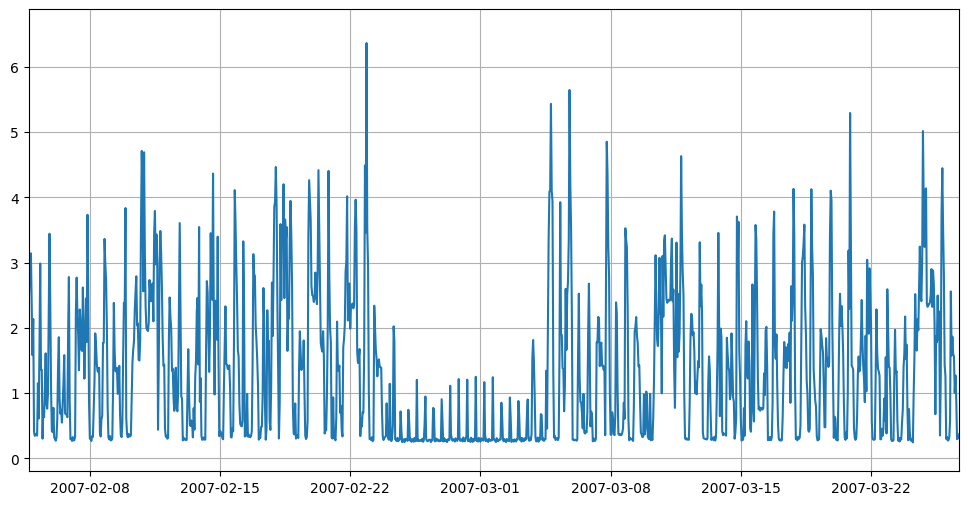

In [123]:
plt.figure(figsize=(12,6))
#plt.plot(df_grouped["timestamp"],df_grouped["Global_active_power"])
plt.plot(df_grouped["timestamp"],df_grouped["Global_active_power"])#-(df_grouped["Sub_metering_1"]/1000+df_grouped["Sub_metering_2"]/1000+df_grouped["Sub_metering_3"]/1000))
#plt.plot(df_grouped["timestamp"],df_grouped["Sub_metering_2"]/1000)
#plt.plot(df_grouped["timestamp"],df_grouped["Sub_metering_3"]/1000)
plt.xlim(df_grouped["timestamp"].min()+pd.Timedelta(days=50),df_grouped["timestamp"].min()+pd.Timedelta(days=100))
plt.grid()
plt.show()

<Figure size 2000x600 with 0 Axes>

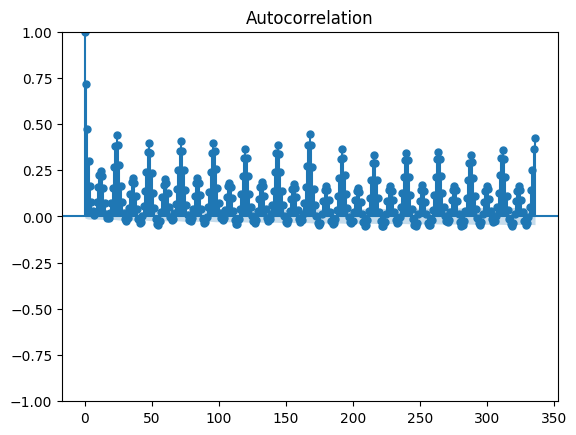

In [96]:
df_grouped = df_grouped.fillna(0)
plt.figure(figsize=(20,6))
plot_acf(df_grouped["Global_active_power"],lags=14*24)
plt.show()

In [99]:
df_grouped[df_grouped.isna().any(axis=1)]

,timestamp,Global_active_power,Global_reactive_power,Global_intensity,Voltage,nan_rows,Sub_metering_1,Sub_metering_2,Sub_metering_3
3176,2007-04-28 01:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
3177,2007-04-28 02:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
3178,2007-04-28 03:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
3179,2007-04-28 04:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
3180,2007-04-28 05:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
33165,2010-09-28 14:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
33166,2010-09-28 15:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
33167,2010-09-28 16:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
33168,2010-09-28 17:00:00,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0
